In [1]:
import pixiedust

Pixiedust database opened successfully


In [2]:
from exp import *

/home/mike/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mike/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mike/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
dm = DatasetManager('2017',224,'all','2017')

In [5]:
def reload_dataset(dm,segmented=False, seed=1):
    path_to_append = ''
    if segmented: 
        path_to_append = ('_segmented_absolute_gray' if segmented == 'absolute_gray' else '_segmented')
    
    random_seed(seed,True)
    tfms = get_transforms(flip_vert=True, max_rotate=180,max_zoom=1.3, max_lighting=0,p_affine=1, max_warp=0,)
#     tfms = [[],[]]
    
    data = ImageList.from_folder(dm.get_dataset_path('train_images').parent)\
    .split_by_folder(train=dm.get_dataset_path('train_images').name + path_to_append,
                   valid=dm.get_dataset_path('valid_images').name +path_to_append)\
    .label_from_func(dm.get_label_for_image_path)\
    .transform(tfms,size=224)\
    .databunch(bs=16)\
    .normalize(imagenet_stats)
    return data

data = reload_dataset(dm,segmented='absolute_gray')

In [6]:
%%pixie_debugger
data.train_ds[0][0]

In [6]:
train_count,valid_count = pd.value_counts(data.train_ds.y.items),pd.value_counts(data.valid_ds.y.items)
train_count.index,valid_count.index = [data.classes[i] for i in train_count.index],[data.classes[i] for i in valid_count.index]

print('train_count: \n',train_count,'\n\n','valid_count: \n', valid_count)
print('ratios:')
print(valid_count / train_count, '%')

train_count: 
 seborrheic_keratosis_or_nevus    1626
melanoma                          374
dtype: int64 

 valid_count: 
 seborrheic_keratosis_or_nevus    120
melanoma                          30
dtype: int64
ratios:
seborrheic_keratosis_or_nevus    0.073801
melanoma                         0.080214
dtype: float64 %


# Baseline with Resnet 50

In [7]:
data = reload_dataset(dm)

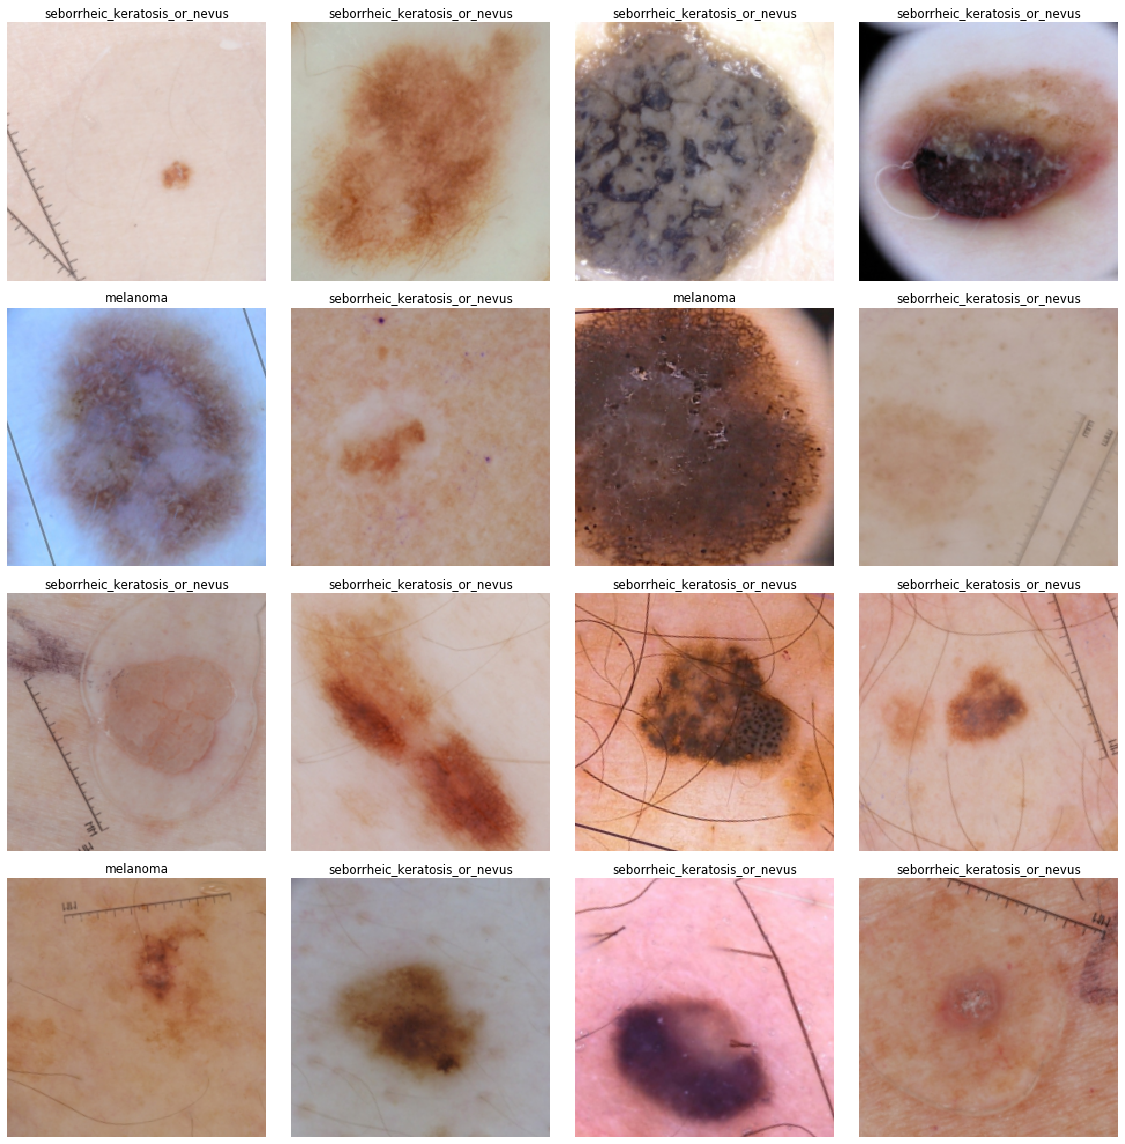

In [8]:
data.show_batch()

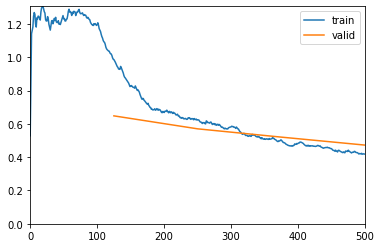

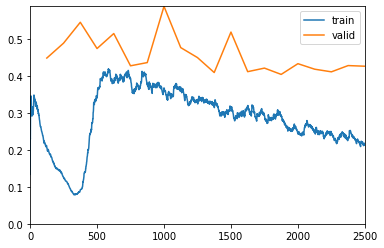

[tensor(0.7733),
 tensor(0.7933),
 tensor(0.8067),
 tensor(0.8133),
 tensor(0.8133),
 tensor(0.8200),
 tensor(0.8200),
 tensor(0.8067),
 tensor(0.8200),
 tensor(0.8400),
 tensor(0.8067),
 tensor(0.8000),
 tensor(0.8200),
 tensor(0.7933),
 tensor(0.8267),
 tensor(0.8000),
 tensor(0.8400),
 tensor(0.8333),
 tensor(0.8600),
 tensor(0.8333),
 tensor(0.8467),
 tensor(0.8400),
 tensor(0.8400),
 tensor(0.8333)]

In [72]:
train_and_return_metrics(data,1,20)

# Segmented 

In [9]:
#bs 16
data = reload_dataset(dm,segmented=True)

# train_and_return_metrics(data,1,20)

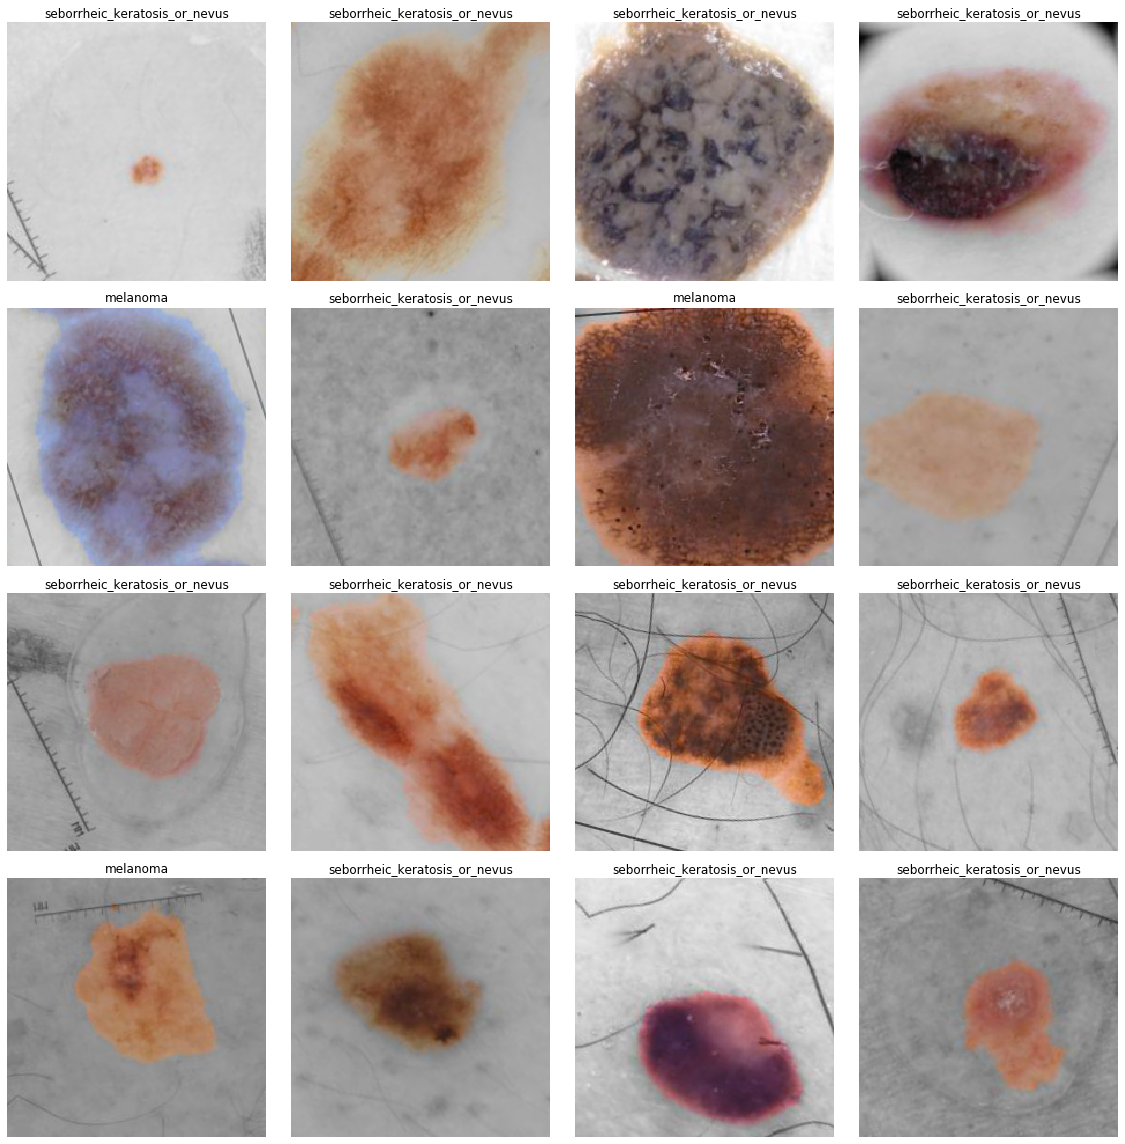

In [10]:
data.show_batch()

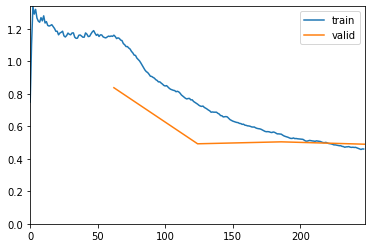

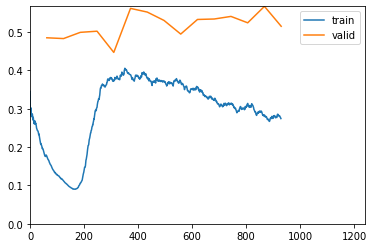

KeyboardInterrupt: 

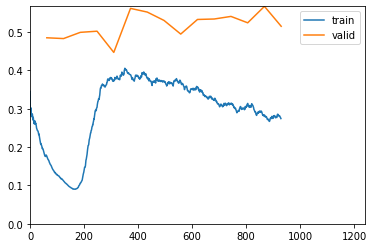

In [81]:
data = reload_dataset(dm,segmented=True)

train_and_return_metrics(data,1,20)

In [ ]:
data.show_batch()

In [ ]:
data = reload_dataset(dm,segmented=True,seed=seed)   
add_shades_of_gray(data)
data.show_batch()

# Segmented absolute gray

In [81]:
#bs 16
data = reload_dataset(dm,segmented='absolute_gray')

# train_and_return_metrics(data,1,20)

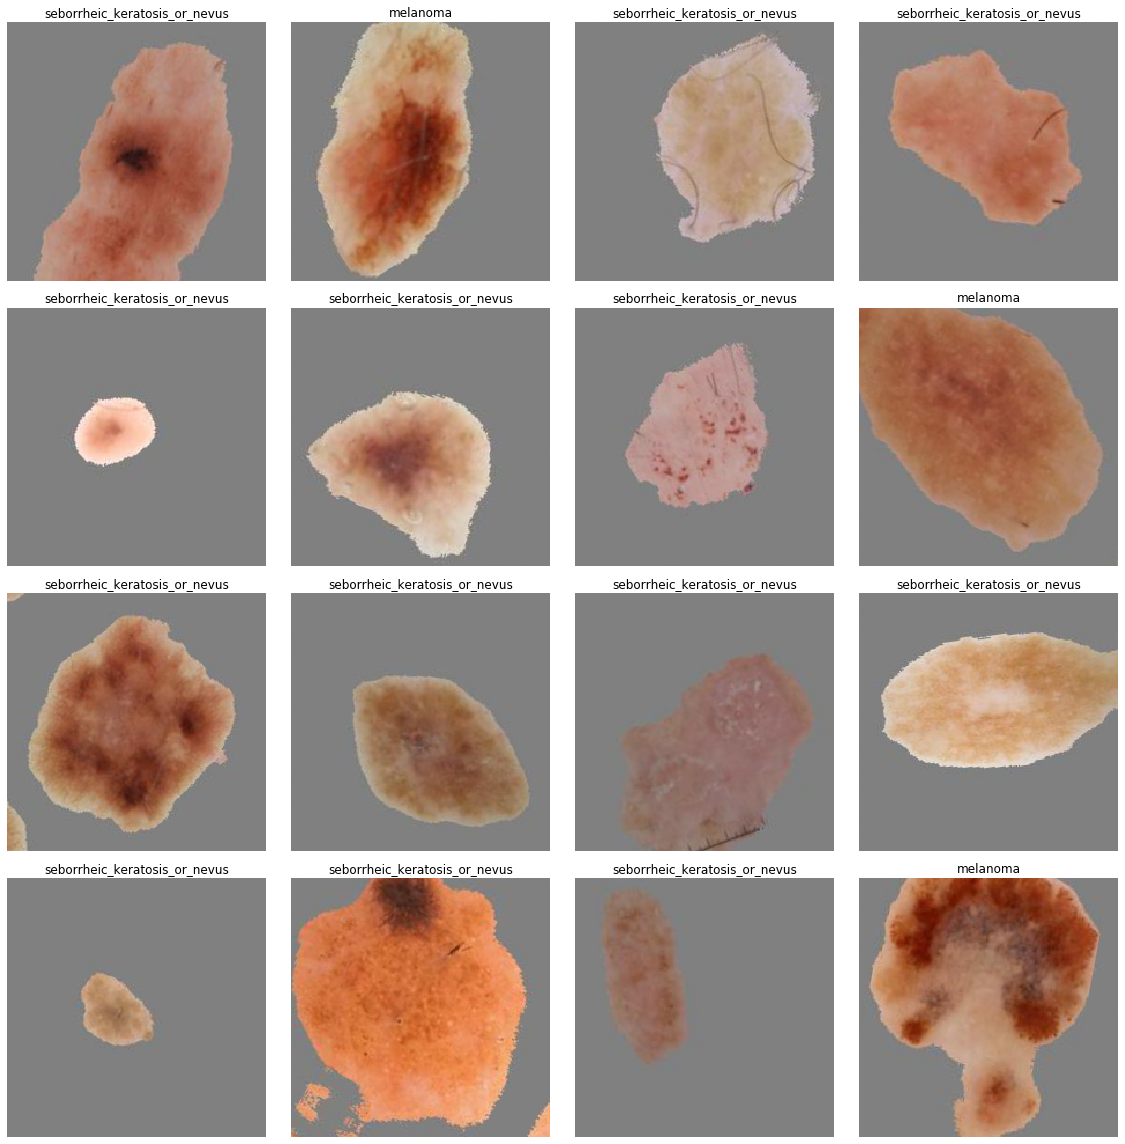

In [82]:
data.show_batch()

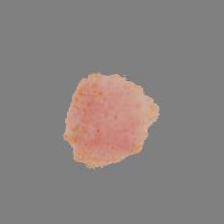

In [87]:
data.train_ds[3][0]

In [14]:
def train_and_return_metrics(data,seed,epochs):
    random_seed(seed,True)
    learner = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy, AUROC()],
                        callback_fns=[ShowGraph, OverSamplingCallback], 
                        pretrained=True)
    
        
    random_seed(seed,True)
    learner.fit_one_cycle(4,max_lr=slice(3e-3))
    accuracies = list(map(lambda x: x[1], learner.recorder.metrics))
    
    #Unfreeze
    learner.unfreeze()
    learner.fit_one_cycle(epochs, max_lr=slice(3e-4))
    
    accuracies += list(map(lambda x: x[1], learner.recorder.metrics))


    return accuracies

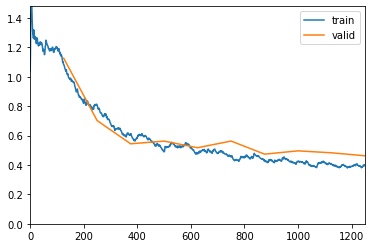

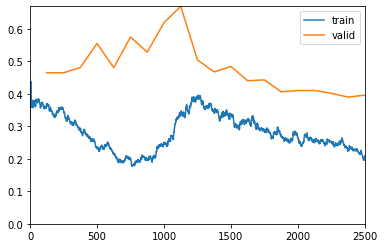

[tensor(0.5667),
 tensor(0.7133),
 tensor(0.7933),
 tensor(0.7667),
 tensor(0.8000),
 tensor(0.8133),
 tensor(0.8067),
 tensor(0.8000),
 tensor(0.8133),
 tensor(0.8000),
 tensor(0.8133),
 tensor(0.8267),
 tensor(0.8200),
 tensor(0.7933),
 tensor(0.8133),
 tensor(0.7800),
 tensor(0.7933),
 tensor(0.7733),
 tensor(0.7800),
 tensor(0.8000),
 tensor(0.8333),
 tensor(0.8133),
 tensor(0.8333),
 tensor(0.8067),
 tensor(0.8200),
 tensor(0.8467),
 tensor(0.8400),
 tensor(0.8333),
 tensor(0.8400),
 tensor(0.8200)]

In [91]:
data = reload_dataset(dm,segmented='absolute_gray')

train_and_return_metrics(data,1,20)

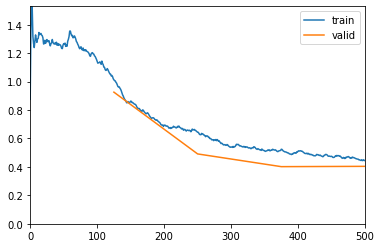

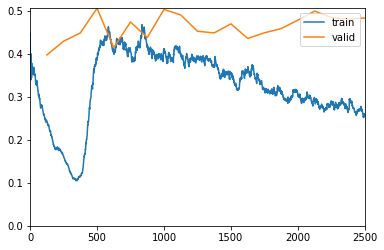

[tensor(0.7000),
 tensor(0.8067),
 tensor(0.8067),
 tensor(0.8267),
 tensor(0.8333),
 tensor(0.8200),
 tensor(0.8200),
 tensor(0.7933),
 tensor(0.8133),
 tensor(0.7800),
 tensor(0.8267),
 tensor(0.7933),
 tensor(0.7800),
 tensor(0.8000),
 tensor(0.8267),
 tensor(0.8067),
 tensor(0.8333),
 tensor(0.8067),
 tensor(0.8200),
 tensor(0.7933),
 tensor(0.8000),
 tensor(0.8000),
 tensor(0.8000),
 tensor(0.8000)]

In [41]:
data = reload_dataset(dm,segmented='absolute_gray')

# train_and_return_metrics(data,1,20)

# Comparison for various seeds

In [15]:
results_file_name = 'results/segmentation_analysis_seed'
# columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']
columns = ['Segmented']



In [16]:
def write_results(seed,*args):
    f = open(f'{results_file_name}_{seed}.txt','w+')
    f.write(','.join(columns) + '\n')
    
    for epoch in zip(*args):
        line = ''
        for idx, variant in enumerate(epoch):
            line += str(variant.item())
            if idx != (len(epoch) - 1): 
                line += ','
            else: 
                line += '\n'
        
        f.write(line)


    f.close()

In [11]:
def add_shades_of_gray(data):
    color_constancy_tfm = correct_color_shades_of_gray(gamma=2.2, order=0,p=6)
    data.train_ds.tfms.insert(0,color_constancy_tfm);
    data.valid_ds.tfms.insert(0,color_constancy_tfm);
    

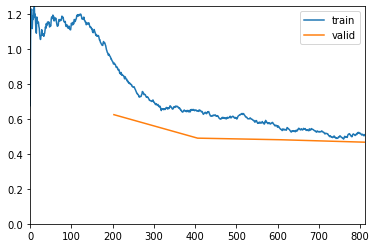

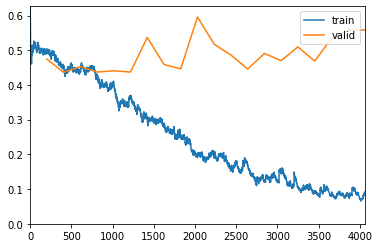

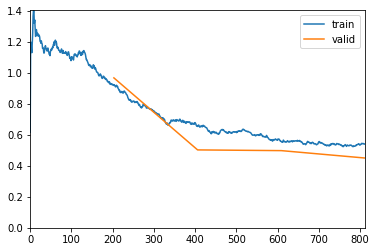

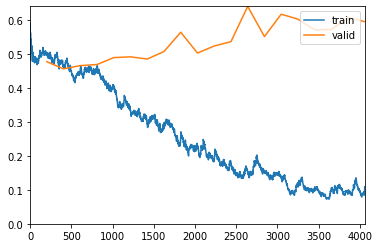

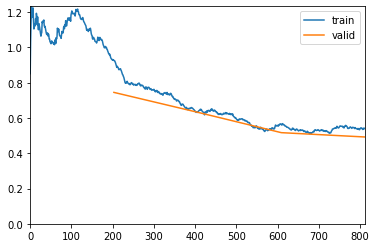

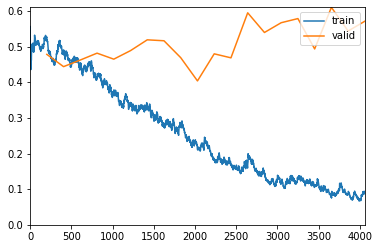

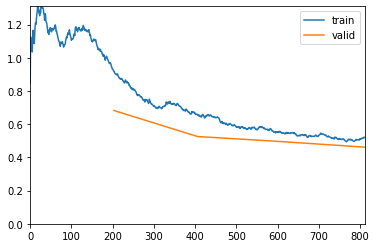

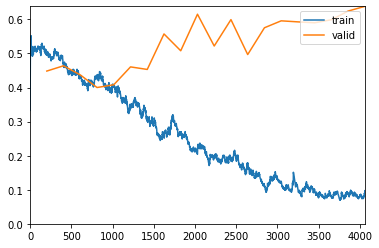

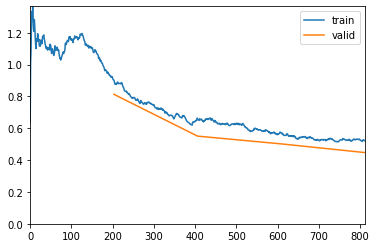

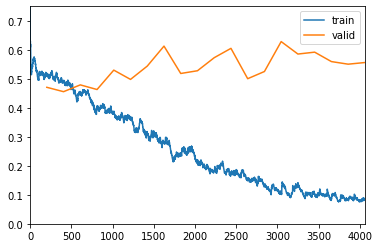

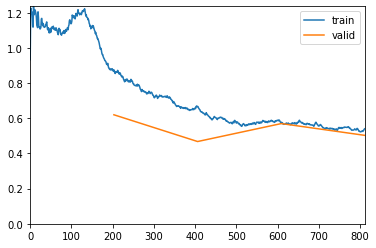

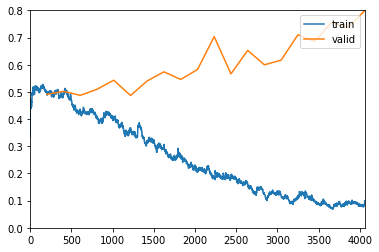

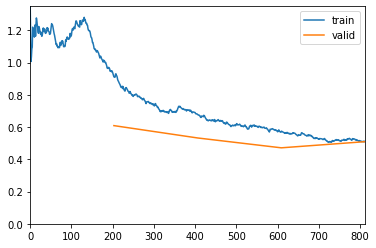

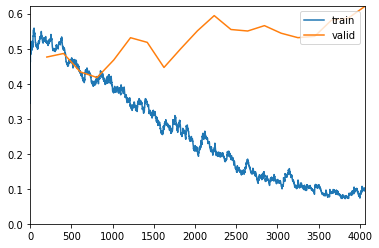

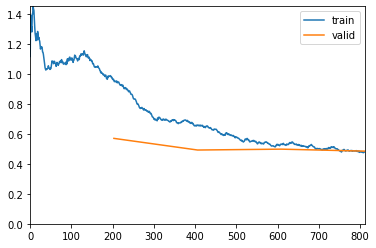

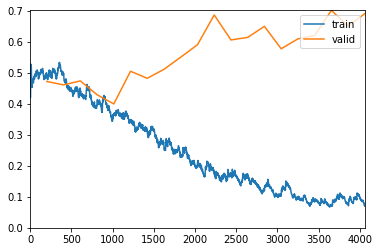

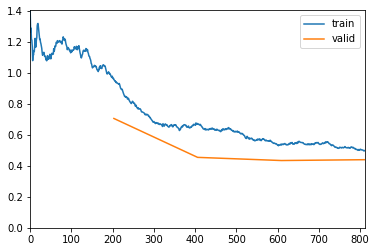

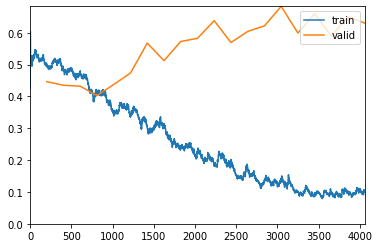

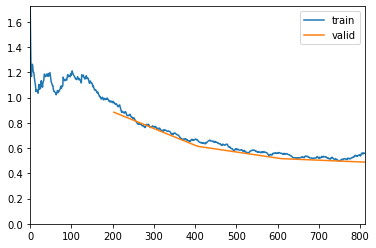

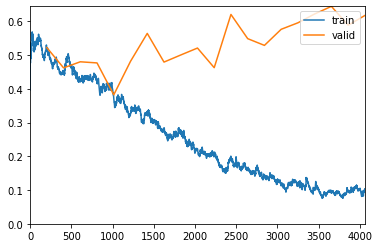

In [17]:
seeds = range(1,11)
epochs = 20

for seed in seeds:
    
#     #Baseline
#     data = reload_dataset(dm,seed=seed)    
#     baseline_accs = train_and_return_metrics(data,seed,epochs)

    
    #With segmentation
    data = reload_dataset(dm,segmented=True, seed=seed)
    segmented_accs = train_and_return_metrics(data,seed,epochs)
    
    
#     #Baseline + Shades of Gray
#     data = reload_dataset(dm,seed=seed) 
#     add_shades_of_gray(data)
#     baseline_sog_accs = train_and_return_metrics(data,seed,epochs)
    
#     #segmentation + Shades of Gray
#     data = reload_dataset(dm,segmented=True, seed=seed)   
#     add_shades_of_gray(data)
#     segmented_sog_accs = train_and_return_metrics(data,seed,epochs)
    
    
    
    
#     write_results(seed, baseline_accs, segmented_accs,baseline_sog_accs,segmented_sog_accs)
    write_results(seed, segmented_accs)
    
    

# Analyze results

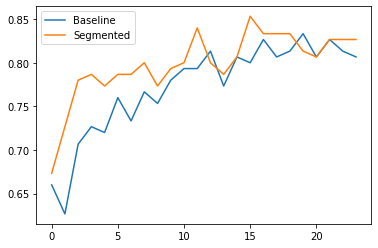

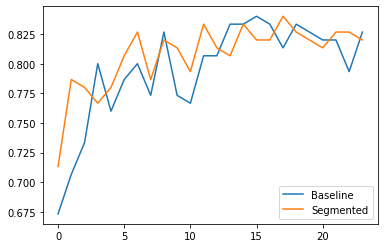

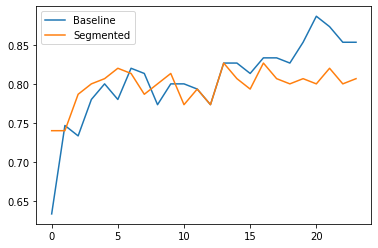

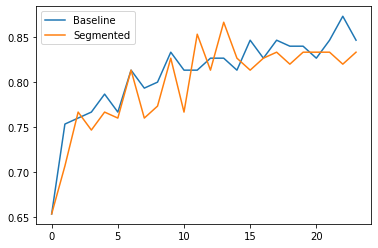

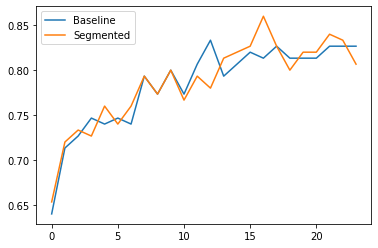

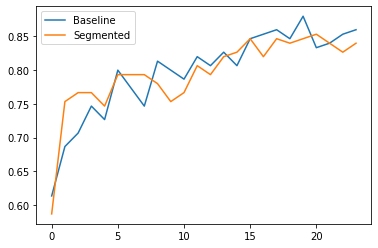

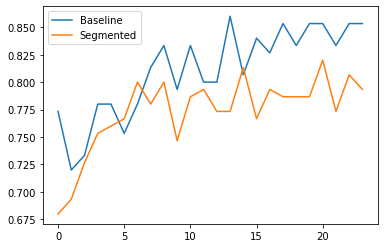

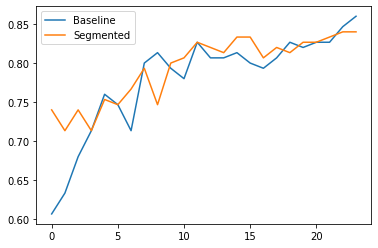

In [98]:
runs = {}
for i in range(1,9):
    runs[i] = pd.read_csv(f'{results_file_name}_{i}.txt')
    runs[i].plot()

In [99]:
max_acc_for_each_run_baseline = [runs[r].max()['Baseline'] for r in runs]
max_acc_for_each_run_segmented = [runs[r].max()['Segmented'] for r in runs]


In [100]:
df = pd.DataFrame({
                    'Baseline':max_acc_for_each_run_baseline,
                    'Segmented': max_acc_for_each_run_segmented
                })

In [101]:
df.describe()

Baseline  Segmented
count  8.000000   8.000000
mean   0.858333   0.845000
std    0.021006   0.016232
min    0.833333   0.820000
25%    0.838333   0.836667
50%    0.860000   0.846667
75%    0.875000   0.855000
max    0.886667   0.866667

In [102]:
times_max_rgb_had_higher_acc = [runs[i].max()['Baseline'] < runs[i].max()['Segmented'] for i in runs]

arl_effectiveness = sum(times_max_rgb_had_higher_acc)/ len(runs)

print(f'Segmentation improved the Accuracy in {arl_effectiveness*100}% of the cases')

Segmentation improved the Accuracy in 25.0% of the cases
